## Data Analytics
## ISE 2 Component

### Name : Prathmesh Vivek Patil
### Roll no. : A39
### PRN no. : 1819000273

## Dataset : Diabetes Classification
Link : https://www.kaggle.com/c/diabetes-classification/data?select=train.csv


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading dataset train.csv

In [ ]:
df = pd.read_csv("train.csv")
df

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0


In [ ]:
df.drop(columns=["p_id"], axis=1, inplace=True)
df

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2,112,68,22,94,34.1,0.315,26,0
1,11,143,94,33,146,36.6,0.254,51,1
2,2,93,64,32,160,38.0,0.674,23,1
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...
609,1,189,60,23,846,30.1,0.398,59,1
610,1,84,64,23,115,36.9,0.471,28,0
611,2,92,52,0,0,30.1,0.141,22,0
612,0,125,96,0,0,22.5,0.262,21,0


In [ ]:
x = df.iloc[:, :-1]
x

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,2,112,68,22,94,34.1,0.315,26
1,11,143,94,33,146,36.6,0.254,51
2,2,93,64,32,160,38.0,0.674,23
3,1,120,80,48,200,38.9,1.162,41
4,3,128,72,25,190,32.4,0.549,27
...,...,...,...,...,...,...,...,...
609,1,189,60,23,846,30.1,0.398,59
610,1,84,64,23,115,36.9,0.471,28
611,2,92,52,0,0,30.1,0.141,22
612,0,125,96,0,0,22.5,0.262,21


In [ ]:
x = df.iloc[:, :-1].values
x

array([[2.00e+00, 1.12e+02, 6.80e+01, ..., 3.41e+01, 3.15e-01, 2.60e+01],
       [1.10e+01, 1.43e+02, 9.40e+01, ..., 3.66e+01, 2.54e-01, 5.10e+01],
       [2.00e+00, 9.30e+01, 6.40e+01, ..., 3.80e+01, 6.74e-01, 2.30e+01],
       ...,
       [2.00e+00, 9.20e+01, 5.20e+01, ..., 3.01e+01, 1.41e-01, 2.20e+01],
       [0.00e+00, 1.25e+02, 9.60e+01, ..., 2.25e+01, 2.62e-01, 2.10e+01],
       [1.00e+00, 1.24e+02, 7.40e+01, ..., 2.78e+01, 1.00e-01, 3.00e+01]])

## Exploratory Data Analysis

### Finding missing values

In [ ]:
missing_val_count_by_column = df.isnull().sum()
print(missing_val_count_by_column)

no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64


#### Thus we can conclude that there are no missing values

### Checking for categorical values

In [ ]:
df.columns

Index(['no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age', 'diabetes'],
      dtype='object')

In [ ]:
df.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [ ]:
df.dtypes

no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

#### Thus we can conclude that there are no categorical values. i.e all features have integer or float values


### Data Visualization

In [ ]:
import seaborn as sns

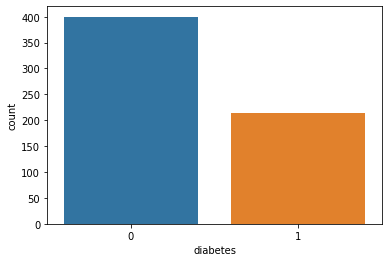

In [ ]:
sns.countplot(x = 'diabetes', data=df)

Thus we have approximately 400 occurances of non-diabetic patients and 200 diabetic patients

In [ ]:
corr = df.corr()

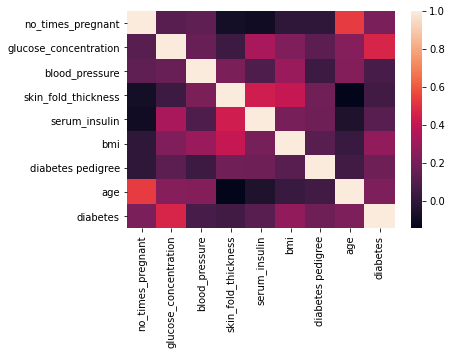

In [ ]:
sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns)

- Brighter colors indicate more correlation. 
- As we can see from the table above and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable.

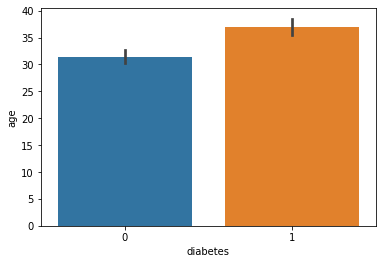

In [ ]:
sns.barplot(x='diabetes', y='age', data=df)

Above figure shows mean age of non diabetic and diabetic patients. 
- We can conclude mean age of diabetic patients is higher.

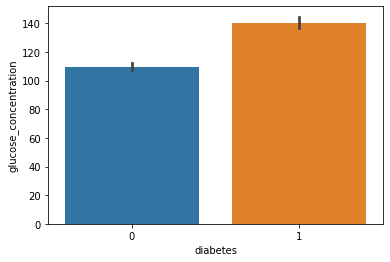

In [ ]:
sns.barplot(x='diabetes', y='glucose_concentration', data=df)

Above figure shows mean glucose concentration of diabetic and non diabetic patients. 
- We can conclude that glucose concentration of diabetic patient is higher

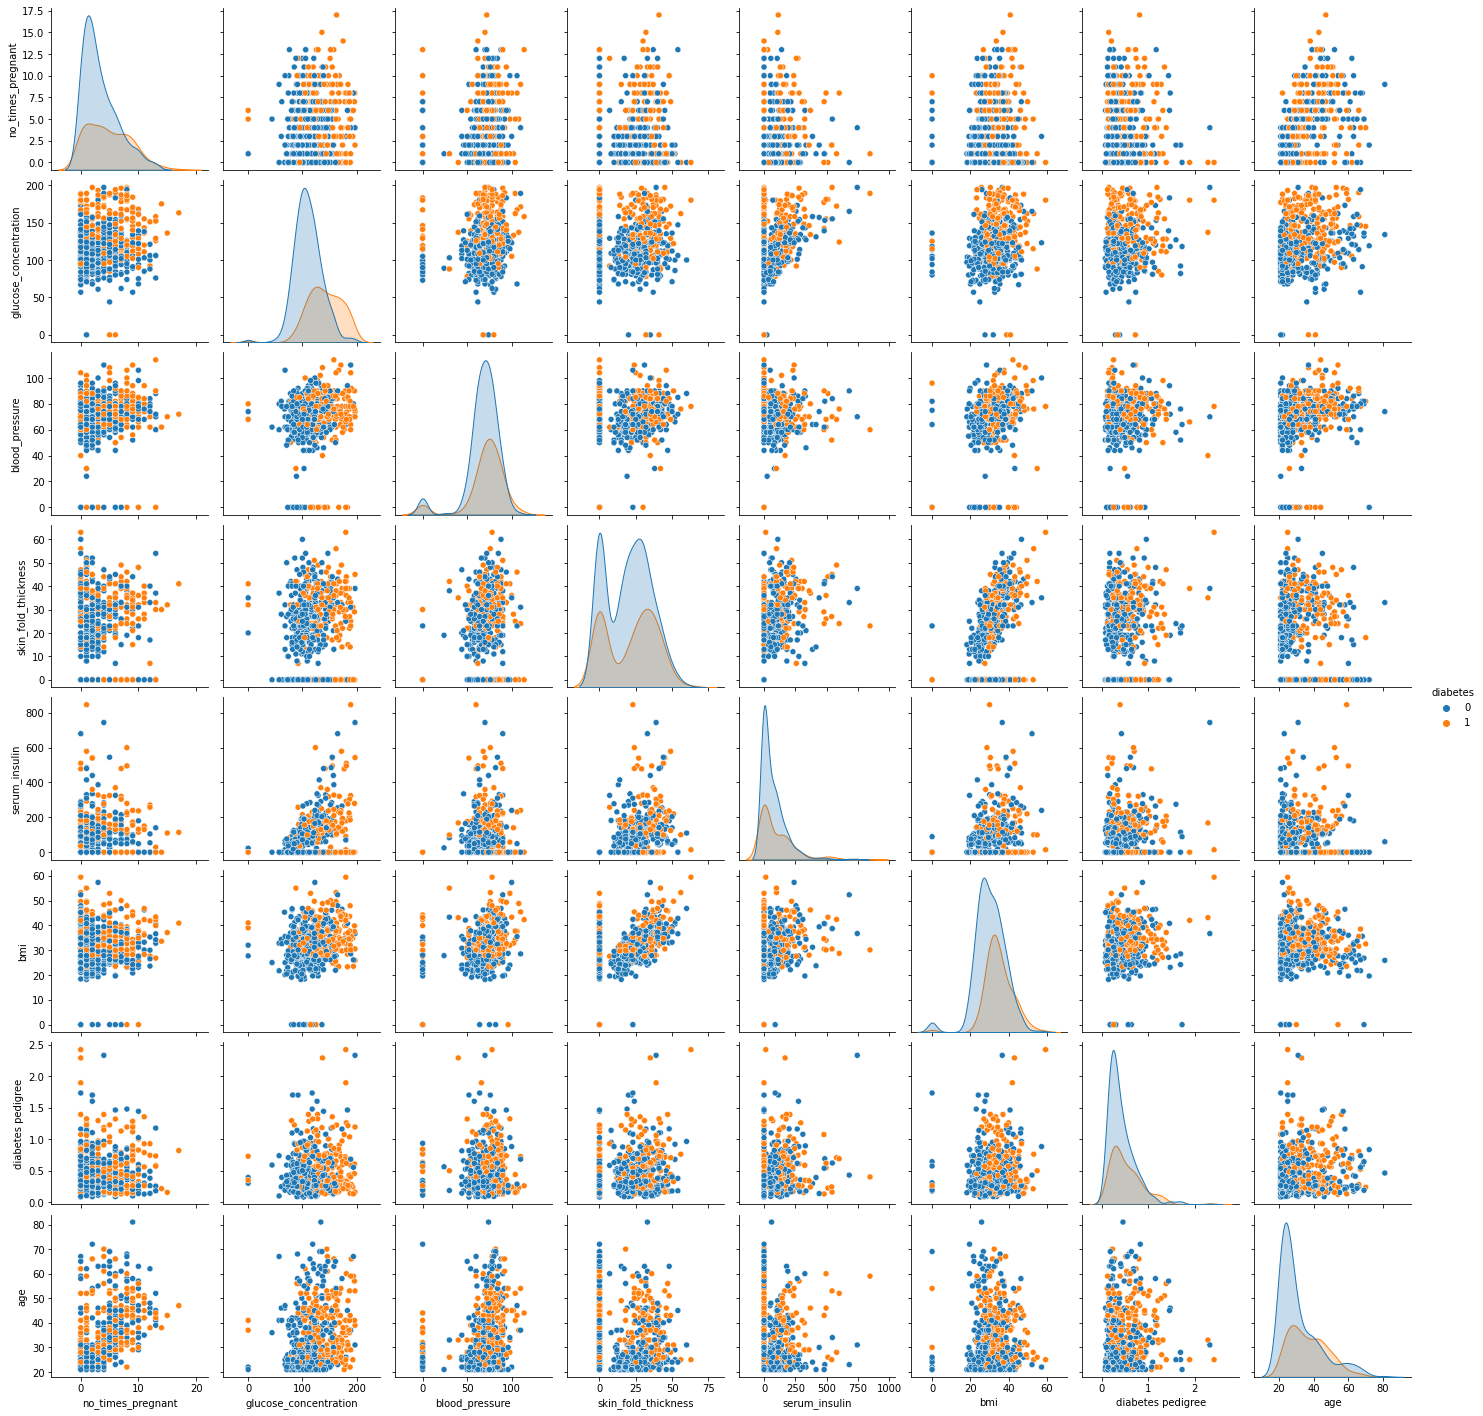

In [ ]:
sns.pairplot(data=df, hue='diabetes')

Above diagram shows that there are some anomalies in dataset. We have some values of glucose_concentration, blood_presure, skin_fold_thickness, serum_insulin and bmi as 0 which can't be true.

#### Thus we will now replace those values with NaN value.

In [ ]:
columns_with_zero_val = ['glucose_concentration','blood_pressure','skin_fold_thickness','serum_insulin', 'bmi']
df[columns_with_zero_val] = df[columns_with_zero_val].replace(0,np.nan)

For checking whether above query has given us NaN values in place of zeros. Earlier in dataset there were no null values which was shown above while checking for missing data. Now we will write same query to check for missing values.

In [ ]:
missing_val_count_by_column = df.isnull().sum()
print(missing_val_count_by_column)

no_times_pregnant          0
glucose_concentration      4
blood_pressure            31
skin_fold_thickness      187
serum_insulin            304
bmi                       10
diabetes pedigree          0
age                        0
diabetes                   0
dtype: int64


serum_insulin has large number of NaN values. Thus it's better to drop that column.

In [ ]:
df.drop(columns=["serum_insulin"], axis=1, inplace=True)
df

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,bmi,diabetes pedigree,age,diabetes
0,2,112.0,68.0,22.0,34.1,0.315,26,0
1,11,143.0,94.0,33.0,36.6,0.254,51,1
2,2,93.0,64.0,32.0,38.0,0.674,23,1
3,1,120.0,80.0,48.0,38.9,1.162,41,0
4,3,128.0,72.0,25.0,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...
609,1,189.0,60.0,23.0,30.1,0.398,59,1
610,1,84.0,64.0,23.0,36.9,0.471,28,0
611,2,92.0,52.0,NaN,30.1,0.141,22,0
612,0,125.0,96.0,NaN,22.5,0.262,21,0


Thus, serum_insulin column has been dropped.

### Replacing NaN values by mean of other values in same column

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
print(x)

[[2.00e+00 1.12e+02 6.80e+01 ... 3.41e+01 3.15e-01 2.60e+01]
 [1.10e+01 1.43e+02 9.40e+01 ... 3.66e+01 2.54e-01 5.10e+01]
 [2.00e+00 9.30e+01 6.40e+01 ... 3.80e+01 6.74e-01 2.30e+01]
 ...
 [2.00e+00 9.20e+01 5.20e+01 ... 3.01e+01 1.41e-01 2.20e+01]
 [0.00e+00 1.25e+02 9.60e+01 ... 2.25e+01 2.62e-01 2.10e+01]
 [1.00e+00 1.24e+02 7.40e+01 ... 2.78e+01 1.00e-01 3.00e+01]]


In [ ]:
print(y)

[0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 1:5])
x[:, 1:5] = imputer.transform(x[:, 1:5])

In [ ]:
missing_val_count_by_column = pd.isnull(x).sum()
print(missing_val_count_by_column)

0


Thus we can see that there are no Nan Values

## Splitting dataset in training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train)

[[0.00000000e+00 9.80000000e+01 8.20000000e+01 ... 2.52000000e+01
  2.99000000e-01 2.20000000e+01]
 [0.00000000e+00 1.13000000e+02 8.00000000e+01 ... 3.10000000e+01
  8.74000000e-01 2.10000000e+01]
 [5.00000000e+00 1.58000000e+02 8.40000000e+01 ... 3.94000000e+01
  3.95000000e-01 2.90000000e+01]
 ...
 [1.00000000e+00 1.11000000e+02 8.60000000e+01 ... 3.01000000e+01
  1.43000000e-01 2.30000000e+01]
 [7.00000000e+00 1.05000000e+02 7.24219554e+01 ... 3.24382450e+01
  3.05000000e-01 2.40000000e+01]
 [2.00000000e+00 1.22000000e+02 5.20000000e+01 ... 3.62000000e+01
  8.16000000e-01 2.80000000e+01]]


In [ ]:
print(x_test)

[[1.00000000e+00 1.18000000e+02 5.80000000e+01 3.60000000e+01
  3.33000000e+01 2.61000000e-01 2.30000000e+01]
 [9.00000000e+00 1.06000000e+02 5.20000000e+01 2.91100703e+01
  3.12000000e+01 3.80000000e-01 4.20000000e+01]
 [0.00000000e+00 1.17000000e+02 6.60000000e+01 3.10000000e+01
  3.08000000e+01 4.93000000e-01 2.20000000e+01]
 [9.00000000e+00 9.10000000e+01 6.80000000e+01 2.91100703e+01
  2.42000000e+01 2.00000000e-01 5.80000000e+01]
 [0.00000000e+00 1.21000000e+02 6.60000000e+01 3.00000000e+01
  3.43000000e+01 2.03000000e-01 3.30000000e+01]
 [3.00000000e+00 1.58000000e+02 7.60000000e+01 3.60000000e+01
  3.16000000e+01 8.51000000e-01 2.80000000e+01]
 [5.00000000e+00 1.16000000e+02 7.40000000e+01 2.91100703e+01
  2.56000000e+01 2.01000000e-01 3.00000000e+01]
 [6.00000000e+00 1.83000000e+02 9.40000000e+01 2.91100703e+01
  4.08000000e+01 1.46100000e+00 4.50000000e+01]
 [2.00000000e+00 8.70000000e+01 5.80000000e+01 1.60000000e+01
  3.27000000e+01 1.66000000e-01 2.50000000e+01]
 [1.000000

## Machine Learning models

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
accuracy_scores_of_all_models = {}

### Using KNN Classifier

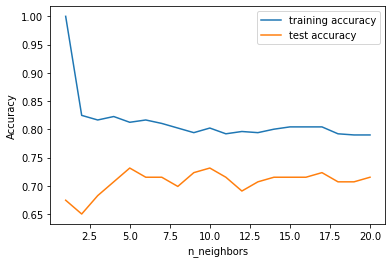

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 21)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(x_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

To find maximum accuracy 

In [ ]:
print(max(test_accuracy))

0.7317073170731707


Maximum accuracy is when we consider 10 neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))
accuracy_scores_of_all_models["KNN Classifier"] = knn.score(x_test, y_test)

0.8024439918533605
0.7317073170731707


### Using Logistic Regression

In [ ]:
logisticregressor = LogisticRegression()
logisticregressor.fit(x_train, y_train)
print("Training set score: {:.5f}".format(logisticregressor.score(x_train, y_train)))
print("Test set score: {:.5f}".format(logisticregressor.score(x_test, y_test)))
accuracy_scores_of_all_models["Logistic Regression"]=logisticregressor.score(x_test, y_test)

Training set score: 0.78411
Test set score: 0.73171


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Using Decision Tree 

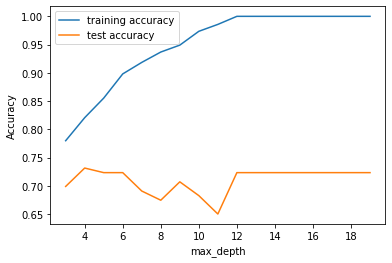

In [ ]:
training_accuracy = []
test_accuracy = []
for i in range(3, 20):
  tree = DecisionTreeClassifier(max_depth=i, random_state=0)
  tree.fit(x_train, y_train)
  training_accuracy.append(tree.score(x_train, y_train))
  test_accuracy.append(tree.score(x_test, y_test))

plt.plot(range(3, 20), training_accuracy, label="training accuracy")
plt.plot(range(3, 20), test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

We can see that after some depth model is prone to overfitting

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(x_train, y_train)
print("Training set score: {:.5f}".format(tree.score(x_train, y_train)))
print("Test set score: {:.5f}".format(tree.score(x_test, y_test)))

Training set score: 0.85540
Test set score: 0.72358


In [ ]:
accuracy_scores_of_all_models["Decision Tree"]=tree.score(x_test, y_test)

### Random Forest Classifier

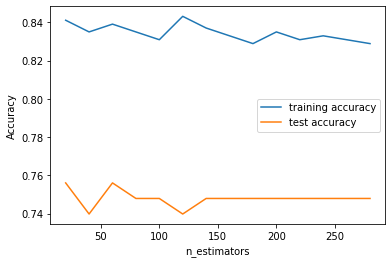

In [ ]:
training_accuracy = []
test_accuracy = []
for i in range(20, 300, 20):
  rf = RandomForestClassifier(max_depth=4, random_state=0, n_estimators=i)
  rf.fit(x_train, y_train)
  training_accuracy.append(rf.score(x_train, y_train))
  test_accuracy.append(rf.score(x_test, y_test))

plt.plot(range(20, 300, 20), training_accuracy, label="training accuracy")
plt.plot(range(20, 300, 20), test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [ ]:
rf = RandomForestClassifier(max_depth=4, random_state=0, n_estimators=60)
rf.fit(x_train, y_train)
print("Training set score: {:.5f}".format(rf.score(x_train, y_train)))
print("Test set score: {:.5f}".format(rf.score(x_test, y_test)))

Training set score: 0.83910
Test set score: 0.75610


In [ ]:
accuracy_scores_of_all_models["Random Forest"]=rf.score(x_test, y_test)

## Visualizing accuracy of all models

In [ ]:
keys = list(accuracy_scores_of_all_models.keys())
values = list(accuracy_scores_of_all_models.values())
print(keys)
print(values)

['KNN Classifier', 'Logistic Regression', 'Decision Tree', 'Random Forest']
[0.7317073170731707, 0.7317073170731707, 0.7235772357723578, 0.7560975609756098]


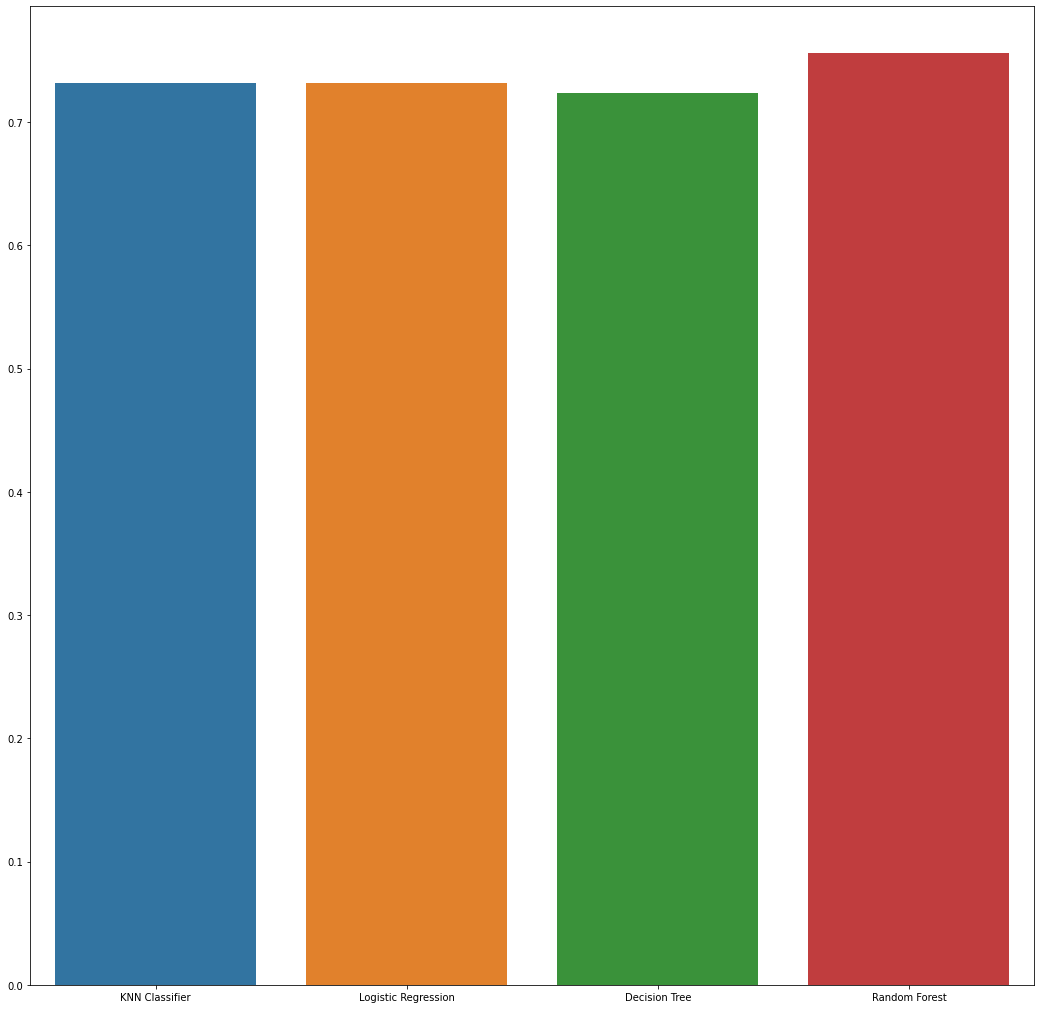

In [ ]:
plt.figure(figsize=(18,18))
sns.barplot(x = keys, y = values)
plt.show()

### Thus, we can conclude that Random Forest has highest accuracy of 0.83910 on training set and 0.75610 on testing set